EKİPLER - C BÖLGESİ
Günler:  12.06.2024, 16.06.2024, 20.06.2024, 24.06.2024, 28.06.2024, 02.07.2024
Lütfen Görüntülemek istediğiniz Günü Yazınız (Toplam Veriyi Görüntülemek İçin X Tuşuna Basınız): a

Geçersiz Gün Adı
Lütfen Görüntülemek istediğiniz Günü Yazınız (Toplam Veriyi Görüntülemek İçin X Tuşuna Basınız): x


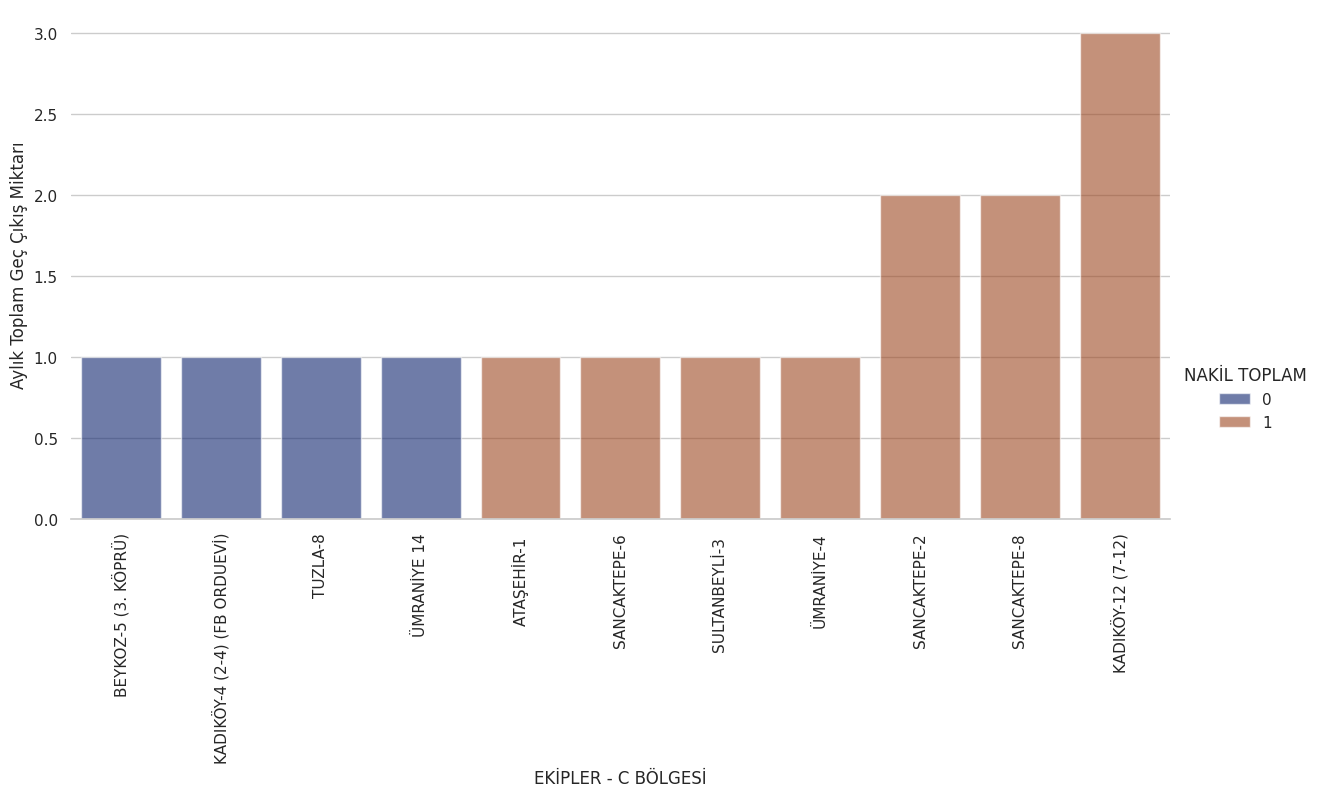

In [ ]:

def late_exit(sheetPath):

  """
  The code is created by using a specific excel file to calculate the number of the late exits of Medical Teams.
  The file has many sheets to parse and for arranging columns starting from iloc[1] and drops unnecessary rows.
  """

  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  import seaborn  as sns

  import warnings
  warnings.filterwarnings('ignore')


  excel_file = pd.ExcelFile(sheetPath)
  sheet_names = excel_file.sheet_names
  data_frames = {}
  merged_df = pd.DataFrame()

  # Loop through each sheet and read it into a DataFrame

  for sheet in sheet_names:
    data_frames[sheet] = excel_file.parse(sheet)
    data_frames[sheet].columns = data_frames[sheet].iloc[1]
    data_frames[sheet] = data_frames[sheet].iloc[2:]

  print(data_frames[list(data_frames.keys())[0]].columns[0])

  for i in range(len(list(data_frames.keys()))):
    merged_df = pd.concat([merged_df, data_frames[list(data_frames.keys())[i]]], ignore_index=True)


  #This is a specific folder to concat all the days and groups them to calculate total late exits for later.
  #data_frames[list(data_frames.keys())[0]].columns[0] brings the first column's name which being used for sort values by the team code

  merged_df = merged_df.groupby(data_frames[list(data_frames.keys())[0]].columns[0]).agg({'EKİP TOP.':'sum', 'NAKİL TOPLAM': 'sum'}).reset_index().sort_values(by = 'EKİP TOP.', ascending = True).reset_index(drop = True)


  #print sheet names
  print(f"Günler: ", ', '.join(list(data_frames.keys())) )

  def visualize():
    """
    The code takes the sheet name as the input and prints the graph.
    """

    a = str(input('Lütfen Görüntülemek istediğiniz Günü Yazınız (Toplam Veriyi Görüntülemek İçin X Tuşuna Basınız): '))


    #The statement uses merged_df for total calculations
    if a.upper() == 'X':

      merged_df.sort_values(by = ["EKİP TOP.", "NAKİL TOPLAM",data_frames[list(data_frames.keys())[0]].columns[0] ], ascending = False).reset_index(drop = True).to_excel(f"{data_frames[list(data_frames.keys())[0]].columns[0]}.xlsx")

    #Visualisation starts
      sns.set_theme(style="whitegrid")
      g = sns.catplot(
          data= merged_df[merged_df['EKİP TOP.'] > 0].sort_values(by=['EKİP TOP.', 'NAKİL TOPLAM', data_frames[list(data_frames.keys())[0]].columns[0]], ascending = True), kind="bar",
          x=data_frames[list(data_frames.keys())[0]].columns[0], y='EKİP TOP.',hue="NAKİL TOPLAM",
          errorbar="sd", palette="dark", alpha=.6, height=6, aspect = 2,
      )
      g.despine(left=True)
      g.set_axis_labels(f"{data_frames[list(data_frames.keys())[0]].columns[0]}", "Aylık Toplam Geç Çıkış Miktarı")
      g.set_xticklabels(rotation=90)


    #If you input only one sheet name, this statement works
    else:
      try:
        daily_data = data_frames[a].sort_values(by = ['EKİP TOP.', 'NAKİL TOPLAM', data_frames[list(data_frames.keys())[0]].columns[0]] , ascending = True)

        daily_data.sort_values(by = ["EKİP TOP.", "NAKİL TOPLAM",data_frames[list(data_frames.keys())[0]].columns[0] ], ascending = False).reset_index(drop = True).to_excel(f"{a} {data_frames[list(data_frames.keys())[0]].columns[0]}.xlsx")

        #Visualisation starts
        sns.set_theme(style="whitegrid")

        g = sns.catplot(
            data = daily_data[daily_data['EKİP TOP.'] > 0], kind="bar",
            x=data_frames[list(data_frames.keys())[0]].columns[0], y='EKİP TOP.', hue = 'NAKİL TOPLAM',
            errorbar="sd", palette="dark", alpha=.6, height=6, aspect = 2,
        )
        g.despine(left=True)
        g.set_axis_labels(f"{data_frames[list(data_frames.keys())[0]].columns[0]}, {a}", "Günlük Toplam Geç Çıkış Miktarı")
        g.set_xticklabels(rotation=90)

      except:
        print('\nGeçersiz Gün Adı')
        return visualize()

  return visualize()


  #return merged_df.sort_values(by = 'EKİP TOP.', ascending = False).to_excel(f'{data_frames[list(data_frames.keys())[0]].columns[0]} Aylık Geç Çıkış.xlsx')
late_exit('/content/C BÖLGESİ GEÇ ÇIKIŞ_ DR MELEK   (2).xlsx')

In [ ]:
x
